In [1]:
import pandas as pd
import numpy as np

# ML
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

Source: https://www.kaggle.com/c/word2vec-nlp-tutorial/code

Some ideas:

- PCA to decrease the number of factors

# Data exploration

In [2]:
# reading data
df = pd.read_csv('labeledTrainData.tsv', sep="\t")
df.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [3]:
# Getting a sense of what the reviews are like
df["review"][1337]

"i just saw this film, i first saw it when i was 7 and could just about remember the end. so i watched it like, 10 minutes ago, and (i may seem like a baby as i am 12 ha-ha) i started to cry at the ending, i forgotten how sad it was. i think i was mainly sad for Anne-Marie because she said: 'i love you Charlie' and also: 'i'll miss you Charlie', just made me really cry ha-ha. it has to be one of me favourite movies of all time, it is just a film well worth watching. WATCH IT ha-ha, thats all i can say XD<br /><br />but, i love this film, its a true classic.<br /><br />xx Maverick xx 10/10"

<AxesSubplot:>

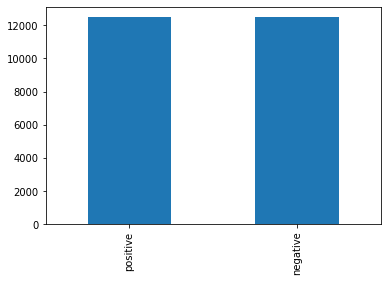

In [4]:
df["sentiment_text"] =  df['sentiment'].apply(lambda sentiment : 'positive' if sentiment == 1 else 'negative')
df["sentiment_text"].value_counts().plot.bar()

# Creating model

In [5]:
# Train and test data
df['random_number'] = np.random.randn(len(df.index))

train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [12]:
# count vectorizer (bag of words):
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['review'])
test_matrix = vectorizer.transform(test['review'])

  (0, 66854)	4
  (0, 2419)	4
  (0, 60699)	11
  (0, 58155)	1
  (0, 25504)	3
  (0, 18100)	1
  (0, 4321)	2
  (0, 60499)	19
  (0, 39659)	1
  (0, 39455)	11
  (0, 29530)	10
  (0, 64657)	2
  (0, 57353)	1
  (0, 35554)	1
  (0, 61208)	9
  (0, 28367)	3
  (0, 40580)	2
  (0, 65883)	1
  (0, 42479)	1
  (0, 17666)	1
  (0, 27977)	1
  (0, 2953)	10
  (0, 60580)	1
  (0, 65877)	2
  (0, 66903)	1
  :	:
  (19722, 287)	1
  (19722, 40951)	1
  (19722, 46578)	2
  (19722, 56462)	3
  (19722, 59891)	2
  (19722, 49036)	1
  (19722, 21886)	1
  (19722, 65995)	2
  (19722, 20920)	1
  (19722, 1280)	1
  (19722, 25240)	1
  (19722, 65989)	1
  (19722, 43396)	1
  (19722, 46292)	1
  (19722, 47462)	1
  (19722, 9053)	4
  (19722, 37717)	1
  (19722, 45356)	1
  (19722, 13120)	1
  (19722, 49599)	1
  (19722, 49168)	1
  (19722, 10898)	1
  (19722, 55976)	1
  (19722, 30441)	1
  (19722, 54514)	1


In [7]:
model = LogisticRegression(max_iter=100)

X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

model.fit(X_train,y_train)

/Users/ullebulle/code/sentiment/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Evaluating

In [8]:
predictions = model.predict(X_test)

confusion_matrix(predictions, y_test)

array([[2326,  286],
       [ 327, 2338]])

In [9]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      2612
           1       0.89      0.88      0.88      2665

    accuracy                           0.88      5277
   macro avg       0.88      0.88      0.88      5277
weighted avg       0.88      0.88      0.88      5277

